## 추측통계

In [5]:
# 모집단(전체집합)과 표본(전체집합에서 뽑은 것)
# 평균, 분산, 사분위 등 통계량을 가지고 표본집단을 설명하고 모수를 추정해서 모집단을 설명
# 모집단을 잘 대변할 수 있는 표본을 잘 뽑아야 함


In [2]:
# 모집단과 표본
# 표본의 추출방법

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\hmkd1\m3_통계수학\data-20230409T235915Z-001\data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
# 샘플 뽑는 방법은 랜덤

np.random.choice([1,2,3],3)   # 1,2,3에서 3개를 뽑으면 중복이 허용되는 choice 함수
np.random.choice([1,2,3],3,replace = False)        # 중복 허용안하려면 replace = False

array([2, 3, 1])

In [4]:
data = np.array([1,2,3,4,5])
p = [0.1,0.2,0.4,0.2,0.1]

sample = np.random.choice(data, size = 10, replace = True, p=p)  # p는 선택될 확률을 지정
print(sample)

[3 4 4 3 3 3 3 5 4 2]


In [5]:
np.random.seed(0)                           # 랜덤 고정
sample = np.random.choice(scores,20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [6]:
# 표본의 평균

sample.mean()

70.4

In [7]:
# 모집단의 평균

scores.mean()

69.53

In [8]:
for i in range(5):
    sample = np.random.choice(scores,20)  
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균',sample.mean(),'\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 



In [9]:
# 확률변수: 동전을 던졌을 때의 확률변수는 0,1 이에 대응해서 확률 1/2 이 있음
# 주사위 경우 확률변수 1~6, 확률 1/6
# 확률분포: 각각 확률변수에 대해 확률이 어떻게 나타나는지,
  # 확률분포가 
# 모집단이 정규분포라고 한다면 표본의 분포도 정규분포를 따른다고 하면 추정하기 편함
# 그래서 모집단의 분포가 중요함. 


In [10]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]         # 확률을 조작

np.random.choice(dice,p=prob)                   # 조작된 확률만큼 뽑히는 것

1

In [11]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]         # 확률을 조작

np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice,num_trial,p=prob)                  
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [12]:
freq, _ = np.histogram(sample,bins=6,range=(1,7))
print(freq,'\n')
rdf = pd.DataFrame({'frequency':freq,
                   'relative frequency':freq/num_trial},
                  index = pd.Index(np.arange(1,7),name = 'dice'))
rdf

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


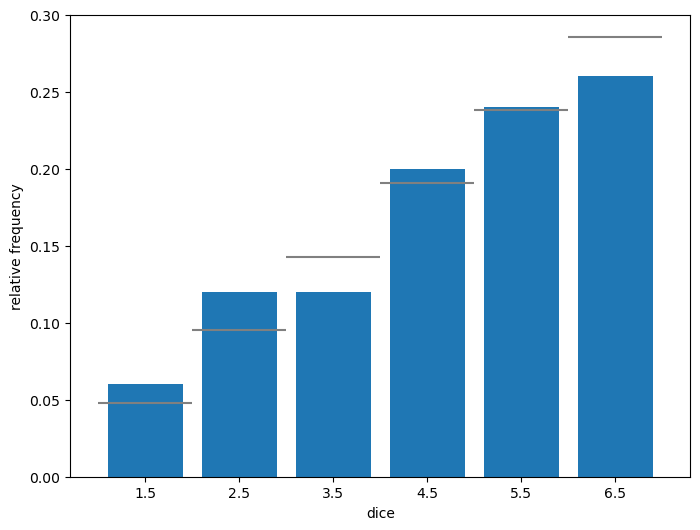

In [13]:
# 100번 시행해 얻은 눈의 상대도수로부터 추측된 확률분포와 실제 확률분포 사이에는 차이 발생
np.linspace(1.5, 6.5, 6)
np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice,num_trial,p=prob)   

plt.figure(figsize = (8,6))
plt.hist(sample, bins = 6, range = (1,7), density = True, rwidth = 0.8)
plt.hlines(prob,np.arange(1,7),np.arange(2,8), colors = 'gray')            # 1~6, 2~7  즉 1-2, ~~ 6-7 이렇게 회색선 표시
plt.xticks(np.linspace(1.5,6.5,6))
# plt.xticklabels(np.arange(1,7))
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

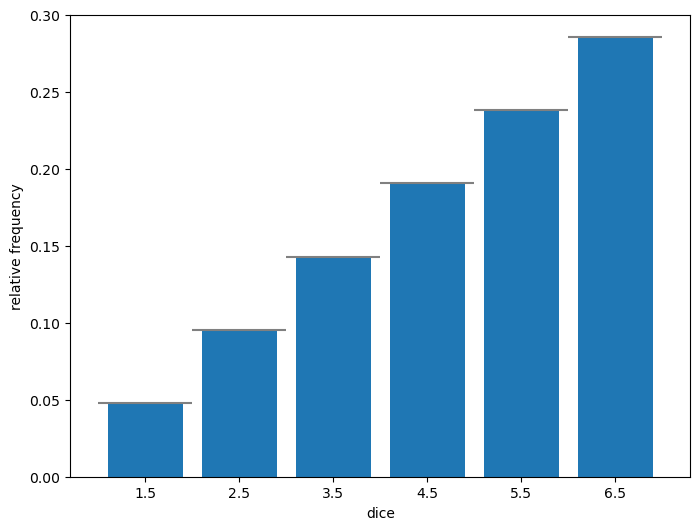

In [14]:
# 1000000번 시행해 얻은 눈의 상대도수로부터 추측된 확률분포는 실제 확률분포로 근접


np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial = 1000000               # 샘플 수가 많아질 수록 상대도수는 확률분포로 수렴된다.
sample = np.random.choice(dice,num_trial,p=prob)   

plt.figure(figsize = (8,6))
plt.hist(sample, bins = 6, range = (1,7), density = True, rwidth = 0.8)
plt.hlines(prob,np.arange(1,7),np.arange(2,8), colors = 'gray')            # 1~6, 2~7  즉 1-2, ~~ 6-7 이렇게 회색선 표시
plt.xticks(np.linspace(1.5,6.5,6))
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

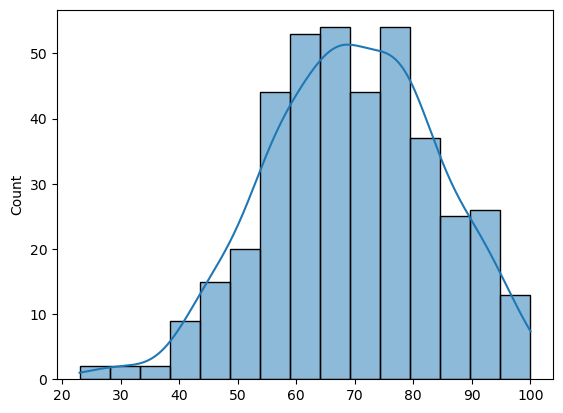

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\hmkd1\m3_통계수학\data-20230409T235915Z-001\data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
sns.histplot(scores,kde=True)
plt.show()

In [16]:
scores.shape          # 400개가 들어가 있음

(400,)

In [17]:
# sample = np.random.choice(scores,10000)   

# scores.shape는 NumPy 배열 scores의 크기(모양)를 반환하는 속성
# 예를 들어, scores가 100개의 샘플과 10개의 클래스를 모으는 경우, scores.shape입니다 (100, 10).

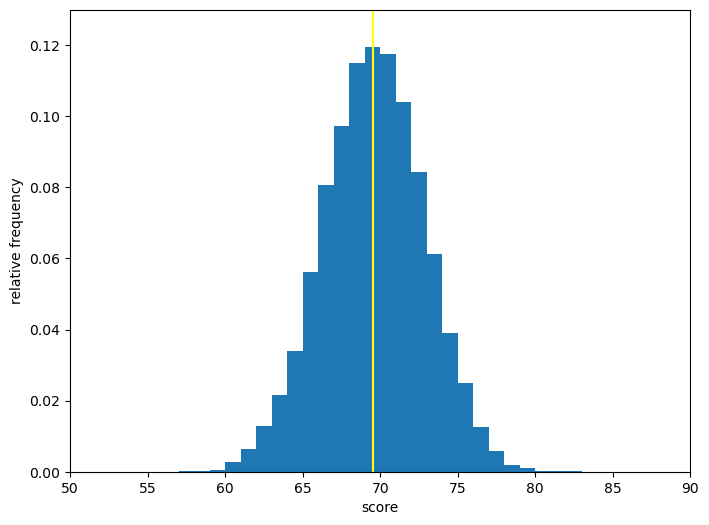

In [18]:
# 표본평균은 모평균을 중심으로 분포하는 것을 확인할 수 있음.
# 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다. 

sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]
len(sample_means)

fig = plt.figure(figsize = (8,6))
plt.hist(sample_means, bins = 100, range = (0,100), density = True)

# 모평균을 세로선으로 표시해 비교

plt.vlines(np.mean(scores),0,1,'yellow')    # 세로 방향으로 수직 선을 그리는 함수
plt.axis([50, 90, 0, 0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링하는 분야입니다. 이를 위해 몇 가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다:

- 실험과 표본 공간: 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.

- 사건과 확률: 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정한 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다.

- 조건부 확률: 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다.

- 독립성: 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.

- 확률분포: 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.

- 기대값: 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것입니다. 즉, 평균값과 유사한 개념입니다.

확률의 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.

- 빈도주의 관점에서는 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 정의합니다. 즉, 많은 반복을 통해 어떤 사건이 발생하는 비율을 계산하는 것입니다. 이 관점에서는 데이터가 수집될 때마다 확률값이 달라지지 않는다고 가정하며, 샘플 크기가 커질수록 이론적인 확률 값과 가까워진다고 봅니다.

- 반면에 베이지안 관점에서는 확률을 "사건이 일어날 가능성"으로 정의합니다. 이 관점에서는 데이터를 수집하기 전에 이미 어떤 사전 지식이 있다는 가정하에 데이터를 수집하고, 그에 따라 사후 확률을 갱신합니다. 이는 사전 지식과 데이터를 통해 모델 파라미터의 확률 분포를 추정하고, 이를 통해 불확실성을 줄이는 것입니다.

- 이러한 차이 때문에 빈도주의 관점에서는 확률을 정확하게 계산하고자 반복 실험을 수행하며, 이론적인 확률값에 근접하도록 데이터 크기를 늘립니다. 반면에 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다.

- 결론적으로, 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다. 빈도주의 관점은 확률을 실험에서 어떤 사건이 일어날 빈도로 이해하며, 베이지안 관점은 확률을 어떤 사건이 일어날 가능성으로 이해합니다. 이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 문제 해결에 사용됩니다. 예를 들어, 빈도주의 방법은 통계적 추론에 사용되며, 베이지안 방법은 패턴 인식, 머신러닝, 자연어 처리 분야 등에서 사용됩니다.

빈도주의 관점은 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 동전을 던져서 앞면이 나올 확률이 얼마나 되는지 알아보려고 한다고 가정해봅시다. 이 경우, 동전을 반복적으로 던져서 앞면이 나올 확률을 계산하는 것이 빈도주의 관점입니다.

- 100번의 실험을 수행해서 앞면이 60번 나왔다면, 앞면이 나올 확률은 0.6, 즉 60%입니다. 이처럼 빈도주의 관점에서는 반복적인 실험을 통해 얻은 데이터를 바탕으로 확률을 계산합니다.

- 이와 같은 방법으로, 빈도주의 관점은 대규모 데이터를 바탕으로 통계적 추론을 수행하는 분야에서 많이 사용됩니다. 예를 들어, 의학 연구에서는 수많은 환자 데이터를 바탕으로 질병 발생 확률을 계산하고, 이를 바탕으로 예방 방법을 제시합니다. 또한, 마케팅 연구에서는 대규모 데이터를 바탕으로 소비자의 구매 확률을 계산하고, 이를 바탕으로 마케팅 전략을 수립합니다.

- 즉, 빈도주의 관점에서는 반복적인 실험을 통해 데이터를 모으고, 이를 바탕으로 확률을 계산합니다. 이를 통해 대규모 데이터에서 일어날 가능성을 추정하고, 이를 바탕으로 데이터 분석 및 예측을 수행합니다.

베이지안 관점은 확률을 "사건이 일어날 가능성"으로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 암 환자 진단 문제를 생각해봅시다. 어떤 환자가 암에 걸렸을 때, 병원에서 검사를 통해 양성 판정이 나왔다고 가정해봅시다. 이 때, 베이지안 관점에서는 이 결과가 실제로 환자가 암에 걸렸음을 의미하는가에 대한 확률을 계산합니다.

- 베이지안 관점에서는 이 확률을 "사전 확률"이라고 부릅니다. 즉, 검사를 통해 양성 판정이 나오기 전에는 이 환자가 암에 걸렸을 확률을 이미 가정하고 있었다는 것입니다. 예를 들어, 이전의 암 환자들의 데이터를 분석하여, 이 환자가 암에 걸렸을 확률을 0.1, 즉 10%로 가정하였다고 합시다.

- 그리고, 이제 검사를 통해 양성 판정이 나왔다고 가정합니다. 이 때, 검사 결과가 양성일 때 암에 걸렸을 확률을 계산하는 것이 베이지안 관점입니다. 이를 "사후 확률"이라고 부르며, 사전 확률과 검사 결과를 고려하여 계산됩니다.

- 예를 들어, 이전의 암 환자들의 데이터에서 암에 걸린 환자 중 80%가 양성 판정을 받았다고 가정합니다. 이러한 정보를 바탕으로, 이 환자가 암에 걸렸을 사후 확률은 다음과 같이 계산됩니다.

사전 확률: 10%
우도(검사 결과가 양성일 확률): 80%
사후 확률: (10% x 80%) / (10% x 80% + 90% x 20%) = 30.8%

즉, 이 환자가 검사 결과가 양성인 경우에는 암에 걸렸을 확률이 30.8%입니다.

예를 들어, 여러분이 복권을 사서 당첨이 되었다고 가정해봅시다. 그리고 당첨된 복권의 확률을 계산하고자 합니다. 이 때, 베이지안 관점에서는 이 확률을 "사후 확률"로 계산합니다.

- 우선, 이 복권의 당첨 확률을 사전 지식으로 가정합니다. 예를 들어, 이 복권이 얼마나 팔렸는지, 이전의 당첨 데이터는 어떻게 되는지 등의 정보를 바탕으로, 사전 확률을 0.001, 즉 0.1%로 가정합니다.

- 그리고, 복권을 구매한 사람들 중에서 몇 명이 당첨되었는지 데이터를 수집합니다. 이를 바탕으로 우도, 즉 "당첨된 복권을 구매한 사람들의 비율"을 계산합니다.

- 예를 들어, 1,000,000 명이 복권을 구매하고, 그 중 1,000 명이 당첨되었다면, 우도는 0.001, 즉 0.1%입니다.

- 그리고, 이 사전 확률과 우도를 결합하여 사후 확률을 계산합니다. 이를 통해, 이 복권을 구매했을 때 당첨될 확률을 추정할 수 있습니다.


이와 같이, 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다. 이를 통해 데이터의 불확실성을 고려하여 예측과 의사결정을 수행합니다.

빈도주의와 베이지안 관점 차이 예시

 

1. 동전을 던졌을 때 앞/뒷면이 나오는 사건의 확률

빈도주의 - 동전을 던져 앞면이 나오는 사건의 '확률'은 0.5이다.

베이지안 - '앞면이 나왔다'는 주장의 신뢰도가 0.5이다.

 

2. 검진결과에 의해 암에 걸렸을 확률이 90%이다.

빈도주의(의사관점) - 이러한 검진결과를 가진환자는 정밀검사를 하면 100에 90명은 암에 걸려있다.

베이지안(환자관점) - 자신이 암에 걸렸음을 주장하는 의사의 주장이 사실일 가능성(신뢰도)가 90%이다.

 

3. 화산이 폭발할 확률을 계산 가능한가?

빈도 확률 구하듯이 화산이 폭발할 확률을 구할 수 없다. 예상하지 못한 지진으로 인해 화산이 폭발할 수 있는 경우도 있고 다양한 요인들이 화산폭발에 영향을 미칠수 있다. 또한, 화산폭발이 주기적으로 반복해서 일어나는것도 아니고 활화산이 휴화산으로 변할 수도 있고 또는 휴화산이 활화선으로도 변할 수 있다. 세상에는 반복할 수 없는 수많은 사건들이 많고 결과에 영향을 줄 수 있는 무수히 많은 변수들이 많기 때문에 빈도주의를 적용할 수 없는 경우가 많다.

-> 빈도주의 하나로 하면 되는데 왜 베이지안 관점을 사용할까?

조금 더 신중하게 오류를 최소화 하기 위함임. 

확률의 수학적 정의와 의미
- 표본공간 과 확률표본
 * 확률표본 또는 표본은 풀고자 하는 문제에서 발생할 수 있는 하나의 현상 혹은 선택될 수 있는 하나의 경우를 말한다.
 * 표본공간은 가능한 모든 표본의 집합을 말하며 고려하는 범위에서 어떤 표본(경우, 현상)이 가능하고 어떤 표본이 가능하지 않은가를 정의하는 작업. 표본공간 = {H,T}, (표본 : H(동전의 앞면), T(동전의 뒷면))
 * 사건은 표본공간의 부분집합, 즉 전체 표본공간 중에서 관심을 가지는 일부 표본의 집합
 
확률
- 확률이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수
- 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수
- 확률은 표본이 아닌 사건을 입력으로 가지는 함수

확률의 의미
- 빈도주의 관점 : 반복적으로 선택된 표본이 사건(부분집합) A의 원소가 될 경향. 동전을 던져 앞면이 나오는 사건의 확률값은 0.5
- 베이지안 관점 : 선택된 표본이 특정한 사건(부분집합)에 속한다는 가설,명제 혹은 주장의 신뢰도로 반복이라는 개념은 사용되지 않음. 새가 날수 있는 가능성은 95%. '앞면이 나왔다'는 주장의 신뢰도가 0.5%
 * 베이지안 확률론에서 사건이 일어났다 혹은 발생했다하는 말은 그 사건의 원소 중에 정말로 선택된 표본이 있다는 사실을 알게 되었다는 것을 말한다.
 
확률의 성질
- 공집합의 확률 : 공집합인 사건의 합은 0이다. P(0) = 0
- 여집합의 확률 : 어떤 사건의 여집합인 사건의 확률은 1 - 원래 사건의 확률 과 같다.
- 포함-배제 원리 : 두 사건의 합집합의 확률은 각 사건의 확률의 합에서 두 사건의 교집합의 확률을 뺀 것과 같다.
- 전체 확률의 법칙 : 생일이 1월인 남자라는 사건의 확률과 생일이 2월인 남자라는 사건의 확률, 이외에도 각각의 월을 생일로 가지는 남자라는 사건들의 확률을 모두 합하면 남자라는 사건의 확률이 된다. 각각의 월에 있는 남자의 생일이 서로 공통 원소가 없음

확률분포함수
- 확률이 어디에 어느 정도 분포되어 있는지를 수학적으로 명시하고 전달하는 도구
- 만약 표본의 개수가 무한하다면 현실적으로 모든 사건을 하나 하나 기술하는 것은 불가능하며 확률분포함수를 이용하여 이 문제를 해결
 * 확률질량함수 : 유한 개의 사건이 존재하는 경우 각 단수사건에 대한 확률만 정의하는 함수
 * 누적분포함수 : 시작점을 모두 또같이 음의 무한대로 통일한 특수한 구간을 사용하는 사건의 확률분포를 묘사하는 함수
 * 확률밀도함수 : 누적분포함수를 미분하여 구한 도함수를 의미하며 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마난 높은가를 나타내는 것이며 그 값 자체가 확률은 아니다.

확률변수
 - 확률적인 숫자 값을 출력하는 변수

#### 추측통계
확률을 사용하여 모집단의 통계적 성질을 추측하는 기법

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다. 

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐.<br>(표본평균의 표준편차는 모집단의 표준편차를 표본의 크기로 나눈 값이 됩니다. 따라서 표본의 크기가 커질수록 표본평균의 표준편차는 작아지게 됩니다.)<br> 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1)
<bR> 여기서 편향(bias)이란 추정량의 기댓값이 모집단의 모수와 다른 값을 가지는 경우
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 표본통계량이 모집단의 모수(parameter)를 추정하는 데 있어서 편향되지 않는 성질. 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
    - 각각의 성질이 충족되면 추정량이 모수를 정확하게 추정할 수 있는 더욱 신뢰할 수 있는 추정량이 된다.
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  
  https://drhongdatanote.tistory.com/57 

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [19]:
# 평균 4 표준편차 0.8인 정규분포에서 10개의 샘플을 추출하세요

from scipy import stats
population = stats.norm(loc=4,scale=0.8)
population.rvs(size = 10)                   # 무작위 샘플을 생성하는 메서드

array([4.93089857, 3.36017534, 3.05630846, 3.37949061, 4.68245181,
       2.10272798, 3.72757812, 3.1472555 , 3.91249601, 4.73876224])

In [24]:
sample_mean_array = np.zeros(10000)
for i in range(10000):
    sample_mean_array[i] = population.rvs(size = 10).mean()
sample_mean_array[:10]                # 각 샘플의 평균 만 개를 배열에 집어넣은 것. 

array([4.52841345, 4.22288914, 4.32279636, 4.24013632, 4.07191851,
       3.9542361 , 3.92897882, 4.19621483, 4.20597347, 3.5737791 ])

In [25]:
# 표본평균의 평균

sample_mean_array.mean().round(2)

4.0

In [26]:
# 표본평균의 표준편차

sample_mean_array.std(ddof=1).round(2)   # 불편분산

0.25

<AxesSubplot:ylabel='Count'>

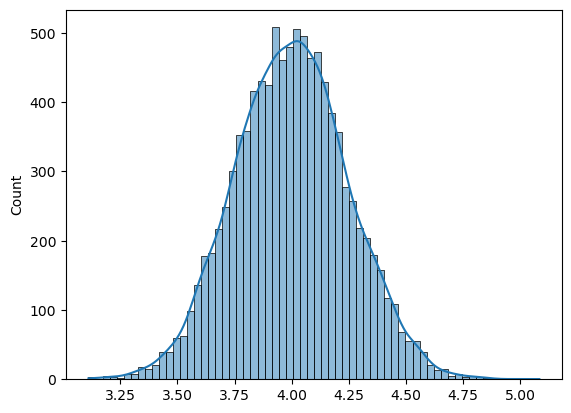

In [27]:
sns.histplot(sample_mean_array, kde = True)

# 4.0을 기준으로 정규분포를 이루고 있음

In [28]:
# 샘플사이즈 변화

size_array = np.arange(10,100100,100)
len(size_array)

1001

In [29]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [30]:
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션

np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[990:]

# 

array([3.99954467, 4.00115947, 4.00311652, 3.99975072, 3.99989178,
       3.99777706, 3.99881193, 3.99936965, 3.99778023, 3.99851887,
       3.99990764])

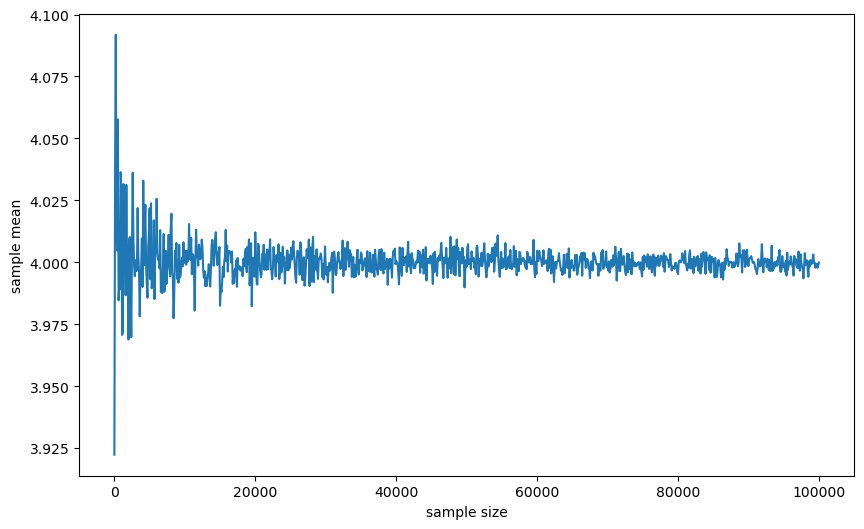

In [31]:
plt.figure(figsize = (10,6))
plt.plot(size_array,sample_mean_array_size)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()


# 샘플사이즈가 커지면 모집단을 좀 더 잘 설명할 수 있다는 것

 샘플 횟수가 많아지면 모평균과 표본평균이 근사해짐. <br>
 모집단 분포가 무엇이든 간에 (정규분포를 따르지 않더라도) 샘플사이즈가 커지면 
 <br>표본 평균들의 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다-> 중심극한정리

In [32]:
# 사용자 함수 (표본평균 계산)

def cal_sample_mean(size,n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size = size).mean()
    return sample_mean_array
np.mean(cal_sample_mean(size = 10, n_trial = 10000 ))

4.001728724963021

#### 과제2_0411
상기 사용자 함수를 사용하여 샘플사이즈가 10,20,30이고 샘플 갯수가 각각 10000개인 3개의 데이터프레임을 생성후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하세요

<AxesSubplot:>

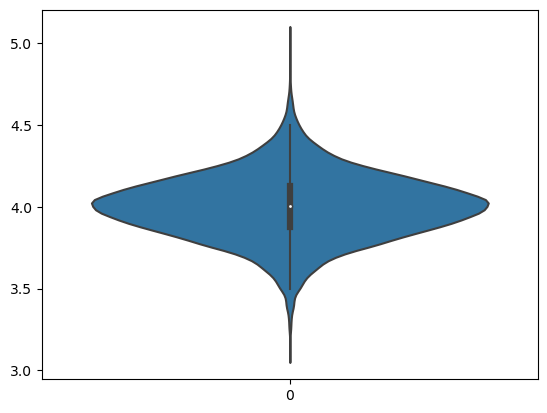

In [33]:
a = pd.DataFrame(cal_sample_mean(size = 10, n_trial = 10000 ))
b = pd.DataFrame(cal_sample_mean(size = 20, n_trial = 10000 ))
c = pd.DataFrame(cal_sample_mean(size = 30, n_trial = 10000 ))

merged_df = pd.concat([a, b, c])
merged_df

sns.violinplot(data=merged_df)

In [34]:
# 정규분포의 확률밀도pdf 계산

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

stats.norm.pdf(loc=4, scale=0.8, x=4)              # 확률밀도함수에서 loc는 평균임. x = 확률변수

0.49867785050179086

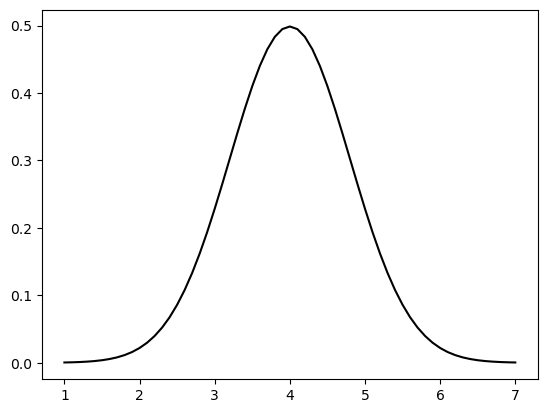

In [35]:
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot, loc=4, scale=0.8),color = 'black')
plt.show()

In [36]:
# Q. 동일 확률밀도함수에서 x = 3일 때의 확률을 구하세요.
norm_dist = stats.norm(loc = 4, scale = 0.8)    # 평균 4의  표준편차가 0.8인 정규분포를 정해놓고
norm_dist.pdf(x=3)

0.2283113567362774

stats.norm.cdf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 누적분포함수(Cumulative Distribution Function, CDF) 값을 계산하는 함수입니다. 
- 정규분포의 누적분포함수는 특정 값보다 작거나 같은 확률을 나타내는데, 이를 통해 특정 값의 분위수를 계산할 수 있습니다.

- stats.norm.cdf(x, loc=0, scale=1) 형태로 사용하며, x는 계산하고자 하는 분위수를 나타내는 값입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

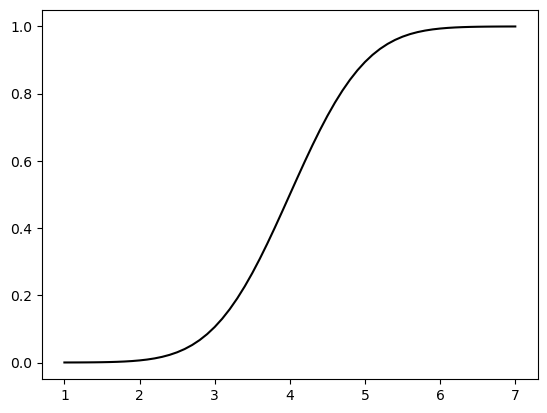

In [37]:
# 누적분포함수

x_plot = np.arange(1, 7.1, 0.1)        # 1~6까지 0.1씩 증가하는 값 생성
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='black')
plt.show()

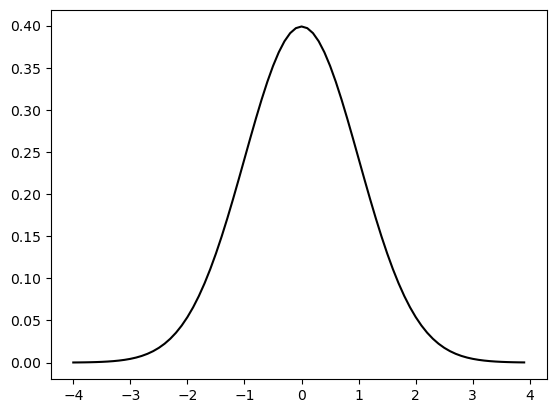

In [38]:
# 아래 그래프의 확률밀도pdf

x_plot = np.arange(-4, 4, 0.1)        # -4~3까지 0.1씩 증가하는 값 생성
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1), color='black')

In [39]:
stats.norm.pdf(x=0)

0.3989422804014327

0.5

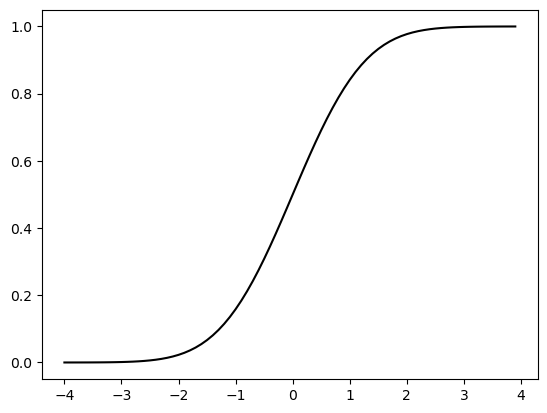

In [40]:
x_plot = np.arange(-4, 4, 0.1)        # -4~3까지 0.1씩 증가하는 값 생성
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=0, scale=1), color='black')
stats.norm.cdf(x=0)

In [41]:
# 하측 확률
stats.norm.cdf(x=0)

0.5

In [42]:
# Q. 평균이 5, 표준편차가 2인 정규분포에서 3이하의 확률 계산

# plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 5, scale=2))
stats.norm.pdf(x=3, loc = 5, scale=2)       # 내가 푼 오답

stats.norm.cdf(x=3, loc = 5, scale=2)

0.15865525393145707

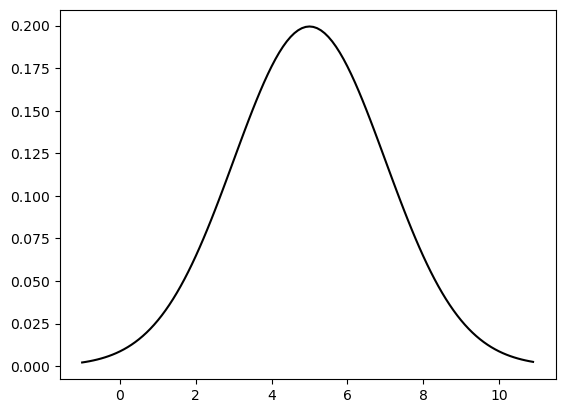

In [43]:
x_plot = np.arange(-1, 11, 0.1)       
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=5, scale=2), color='black')
plt.show()

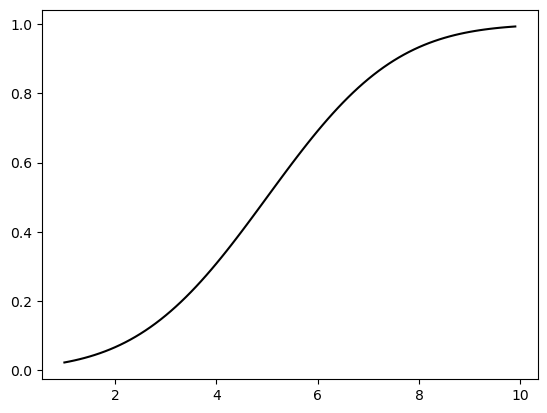

In [44]:
x_plot = np.arange(1, 10, 0.1)       
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=5, scale=2), color='black')
plt.show()

stats.norm.ppf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 분위수(Percent Point Function, PPF) 값을 계산하는 함수입니다. 
- 정규분포의 분위수는 특정 확률을 가지는 값(또는 그보다 작은 값)을 계산할 수 있습니다.
- stats.norm.ppf(q, loc=0, scale=1) 형태로 사용하며, q는 계산하고자 하는 확률값을 나타내는 실수입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

In [45]:
from scipy.stats import norm

x = norm.ppf(0.8,loc=5,scale=2)
print(x)

6.683242467145829


In [46]:
# Q. 평균이 4, 표준편차 0.8인 정규분포에서 확률이 0.5일 때의 분위수 값을 계산하세요.

from scipy.stats import norm
x = norm.ppf(0.5,loc=4,scale=0.8)
print(x)

4.0


#### 자유도
- 통계량이란, 특정한 표본에서 계산되는 어떤 수치를 말합니다. 예를 들어, 표본의 평균이나 분산 등이 통계량이 될 수 있습니다. 이때, 표본의 크기가 작아질수록 통계량을 계산할 때, 계산에 사용되는 데이터의 수가 줄어들기 때문에, 계산에 대한 제약이 더욱 커집니다.
- 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 자유도(degree of freedom)라고 합니다. 자유도가 크면 큰 값, 작으면 작은 값이 나올 수 있고, 이에 따라서 추정 결과가 바뀔 수 있습니다.
- 자유도란, 통계학에서 모집단의 분포를 추정하거나 가설 검정을 할 때, 적게는 1개, 많게는 여러 개의 표본으로부터 통계량을 계산할 때, 표본의 자유도를 말합니다. 간단하게 말하면, 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 의미합니다. 이는 분석하고자 하는 문제나 실험의 특성에 따라 달라지며, 모집단의 분산 추정량을 계산할 때 등 다양한 상황에서 사용됩니다.
- 어떤 학급의 수학시험에서, 20명의 학생들이 시험을 보았고, 각 학생들의 점수를 알고 있다고 가정해봅시다. 이때, 평균 점수를 계산하기 위해서는 각 학생의 점수를 모두 더한 후, 학생 수로 나누면 됩니다. 이때, 평균 점수를 계산할 때는 자유도가 n-1이 됩니다. 이는 계산에 사용되는 데이터의 수(20)에서 1을 뺀 값이기 때문입니다. 따라서, 평균 점수를 계산할 때, 각 학생의 점수를 자유롭게 지정할 수 있는 정도가 n-1만큼 되는 것입니다.-> 평균 때문에 하나는 고정되야 하기 때문에
- 이와 같이, 자유도는 계산에 사용되는 데이터의 수에 따라서 결정되며, 데이터의 수가 적을수록 자유도는 작아지게 됩니다. 따라서, 작은 자유도를 가진 경우에는 계산에 대한 제약이 더욱 커지게 되므로, 이를 고려하여 적절한 분석 방법을 선택해야 합니다.

#### t 분포란
- 일반적으로 여러 실험을 해보면 데이터가 평균 근처에 많이 분포하고 평균에서 멀어질수록 적게 분포하는 형태를 띠는 정규분포를 띠는 경우가 많다. 그런데 정규분포는 표본의 수가 적으면 신뢰도가 낮아진다.
- 신뢰도를 높이기 위하여 표본을 많이 뽑으면 되지만 현실적으로 시간과 비용의 제약으로 한계가 있으며 이에 대한 대응책으로 정규분포보다 한 단계 예측범위가 넓은 분포를 사용하는데, 바로 t분포이다.
- t분포는 정규분포의 표준정규분포처럼 표준이 되는 그래프는 없으며 대신 표본의 수에 따라서 그래프의 모양이 변하며 표본의 수가 많아질수록 점점 표준정규분포와 비슷해지고 표본의 수가 적어질수록 그래프는 점점 옆으로 퍼진다.
- t분포는 확률을 구하는 경우 보다는 신뢰구가 혹은 가설 검정에 주로 사용하는데 특히 표본의 수가 30개 미만일 때, 정규분포와 오차범위가 클 수 있기 때문에 정규분포 대신 예측범위가 넓은 t분포를 사용한다. 표본의 수가 30개 이상이면 정규분포와 비슷해지기 때문에 정규분포를 사용하는 것이 바람직하다.
- t분포로 신뢰구간을 추정하고 가설검정을 할 때, t값을 알아야 하는데 t값은 x축 좌표이다.
- t-값은 t-분포에서의 값으로, 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값입니다. t-값은 표본에서 계산된 통계량으로, 이를 바탕으로 모집단의 특성에 대한 가설을 검증하고, 모집단에 대한 추론을 수행
- t-값은 해당 표본이 모집단과 얼마나 다른지, 혹은 모집단과 유사한지 등을 파악하는 데 사용됩니다. t-값이 크다는 것은 표본과 모집단이 서로 매우 다르다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표하지 못할 가능성이 높습니다. 반면, t-값이 작다는 것은 표본과 모집단이 서로 유사하다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표할 가능성이 높습니다.
-  t-값은 가설 검정에서 중요한 역할을 합니다. 예를 들어, 표본을 사용하여 모집단의 평균이 어떤 값과 차이가 있는지를 검정할 때, t-값을 사용하여 가설 검정을 수행합니다. 이를 통해, 모집단에 대한 가설이 기각되는 경우, 해당 모집단과 표본 간에 차이가 있다는 것을 의미하며, 가설이 채택되는 경우, 해당 모집단과 표본 간에 차이가 없다는 것을 의미합니다.



- t 분포는 모집단 표준편차를 알 수 없을 때 표본 평균과 모집단 평균 사이 표준화된 거리를 설명하며, 관측값은 정규 분포를 따르는 모집단에서 추출됩니다.


t분포는 
- 통계학에서 가설 검정과 신뢰구간 추정에 사용되는 분포입니다. t분포는 정규분포와 유사하지만, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있도록 고안된 분포입니다. 표본의 크기가 커질수록 t분포는 정규분포에 수렴하게 됩니다.
- t분포를 사용하는 이유는 크게 두 가지로 나뉩니다. 첫째, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있습니다. 둘째, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다. 모집단의 분산을 알지 못할 때는 t분포를 이용하여 검정을 하며, 이 경우에는 검정통계량에 대한 검정력이 낮아질 수 있습니다.
- 아래는 t분포를 사용하는 예시입니다.
  - 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다고 가정해봅시다. 이 경우, 각각의 신약에 대한 효과를 비교하기 위해서는 t-검정(t-test)을 사용할 수 있습니다. t-검정은 두 집단의 평균값이 서로 다른지를 검정하는 방법으로, 검정통계량 t를 계산하여 유의수준(alpha)(1-신뢰수준)과 비교하여 검정을 수행합니다. 
  - 만약 검정결과 t값이 양의 값이라면, 첫 번째 집단의 평균값이 더 크다는 것을 의미하며, 음의 값이라면 두 번째 집단의 평균값이 더 크다는 것을 의미합니다. 검정통계량 t는 자유도(n-1)을 가진 t분포를 따르게 됩니다. 따라서, 이 경우 t분포를 이용하여 검정통계량 t에 대한 유의확률(p-value)을 계산할 수 있습니다.

이와 같은 방식으로, t분포를 이용하여 작은 표본의 경우에도 정확한 검정 결과를 얻을 수 있으며, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다.

임계치(Critical value)는 주어진 유의 수준(significance level)에서 귀무가설(null hypothesis)을 기각하기 위한 기준값을 말합니다. 이 값은 통계 검정을 할 때 사용되며, 주어진 검정 통계량(test statistic)과 자유도(degree of freedom)에 따라 달라집니다.

일반적으로 임계치는 표준 정규분포, t-분포, 카이제곱 분포 등과 같은 확률 분포를 이용하여 계산됩니다. 이 때, 유의 수준과 양측 검정 또는 단측 검정 여부에 따라 임계치가 달라집니다.

임계치를 구하는 방법은 분포의 누적 분포 함수(cumulative distribution function, CDF)를 이용하여 계산할 수 있습니다. 통계 패키지를 이용하거나, 표준 정규분포 테이블, t-분포 테이블, 카이제곱 분포 테이블 등을 참조하여 계산할 수 있습니다.

아래는 일반적으로 사용되는 검정 분포에서의 임계치를 계산하는 식입니다.

1. 표준 정규분포에서의 임계치
- 양측 검정: z = ± z_(α/2), 여기서 α/2는 유의 수준의 반입니다.
- 단측 검정:
    - 귀무가설이 μ ≤ μ0인 경우: z = z_α
    - 귀무가설이 μ ≥ μ0인 경우: z = -z_α
 <br>   <br>
2. t-분포에서의 임계치
양측 검정: t = ± t_(n-1, α/2), 여기서 n-1은 자유도입니다.
단측 검정:
귀무가설이 μ ≤ μ0인 경우: t = t_(n-1, α)
귀무가설이 μ ≥ μ0인 경우: t = -t_(n-1, α)
     <br>   <br>
3. 카이제곱 분포에서의 임계치
양측 검정: 카이제곱(α/2, v)와 카이제곱(1-α/2, v)를 각각 구하여, 임계치를 계산합니다. 여기서 v는 자유도입니다.
단측 검정:
귀무가설이 σ^2 ≤ σ0^2인 경우: 카이제곱(α, v)를 구합니다.
귀무가설이 σ^2 ≥ σ0^2인 경우: 카이제곱(1-α, v

#### 과제_0417

다음 사례에서 두 가지 신약의 효과를 비교하기 위하여 t검정을 수행하세요.

- 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다.
- X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
- 유의수준 0.05

귀무가설 : 두 신약의 효과는 차이가 없다(두 집단의 평균값의 차이는 0이다)

대립가설 : 두 신약의 효과는 차이가 있다(두 집단의 평균값의 차이는 0이 아니다)

In [94]:
import numpy as np
from scipy.stats import t

# x1과 x2의 데이터를 입력합니다.
x1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 각 집단의 평균값과 표준편차를 계산합니다.
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)
st1 = std1 / np.sqrt(len(x1))   #표준오차 = 표준편차 / 데이터 개수에 루트 취한 값
st2 = std2 / np.sqrt(len(x2))

# t-검정을 수행하기 위한 변수를 계산합니다.
# t_score는 두 집단의 평균값 차이를 두 집단의 표준 오차의 가중평균으로 나눈 값
t_score = (mean1 - mean2) / ((st1**2 + st2**2)**0.5)

# 유의수준을 0.05로 설정하고, 양측 검정을 수행합니다.
alpha = 0.05           # 유의수준
df = len(x1)-1         # 자유도

t_crit1 = t.ppf(alpha/2, df)   # 양측검정의 임계값
t_crit2 = t.ppf(1-alpha/2, df)   # 양측검정의 임계값

p_value = t.sf(abs(t_score), df)*2    #p-value

# 검정 결과를 출력합니다.
print(f"검정통계량: {t_score}")
print(f"유의확률: {p_value}")
print(f'임계값: {t_crit1}, {t_crit2}')

# 검정통계량이 임계값 사이에 있으므로 귀무가설을 기각할 수 없음(귀무가설 채택)
# 유의확률이 유의수준보다 크므로 귀무가설을 기각할 수 없음

# 만약 p(유의확률)값이 유의수준(0.05)보다 작으면, 귀무가설을 기각하고 대립가설을 채택할 수 있음

검정통계량: 0.778498944161523
유의확률: 0.4562539242596302
임계값: -2.262157162740992, 2.2621571627409915


### 과제2_0417.
위 사례에서 두 가지 신약의 효과를 비교하기 위하여 p값으로 검정을 수행하세요.

In [47]:
# t-value는 일반적으로 표본 평균과 모집단 평균의 차이를 표준오차로 나눈 값으로 계산

sample_data = [2.3,3.5,1.8,4.1,2.7]                   # 샘플 데이터 설정
sample_mean = sum(sample_data) / len(sample_data)    # 표본 평균 계산
sample_std = stats.tstd(sample_data)          # 표본 표준편차 계산.    scipy.stats 모듈의 tstd() 함수를 사용
pop_mean = 3.0       # 모집단 평균 가정
t_value = (sample_mean-pop_mean) / (sample_std/len(sample_data)**0.5)
# t-값은 다음 공식을 사용하여 계산됩니다. 
# t = (sample_mean - pop_mean) / (sample_std / sqrt(n))

t_value

-0.2907009498669058

In [48]:
# t값의 표본분포

from scipy import stats
np.random.seed(1)
t_value_array = np.zeros(10000)         # 제로스 함수를 써서 만개짜리 배열 만들기
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size =10)             # rvs 샘플 뽑는 것
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

<AxesSubplot:ylabel='Density'>

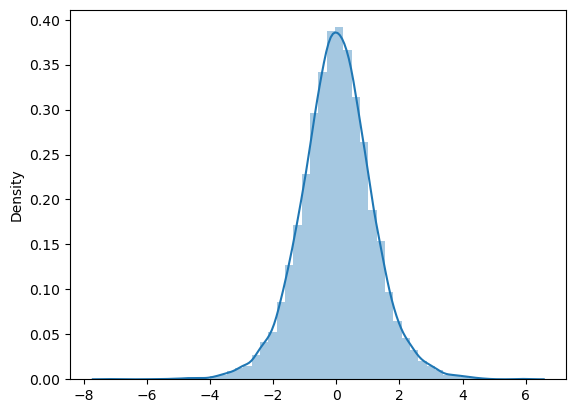

In [49]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(t_value_array)

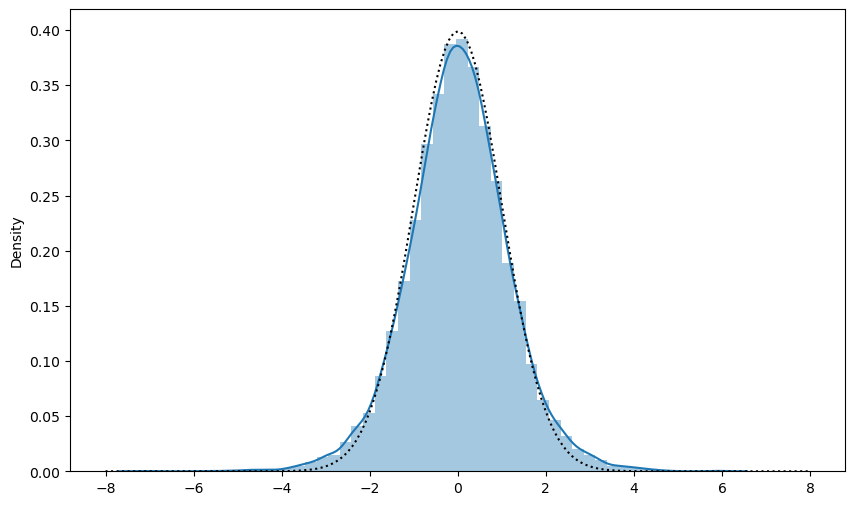

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(t_value_array)

x = np.arange(-8,8.1,0.1)
plt.plot(x,stats.norm.pdf(x=x),
        color = 'black', linestyle='dotted')

# t분포는 표본정규분포에 비해 옆으로 퍼져있음.

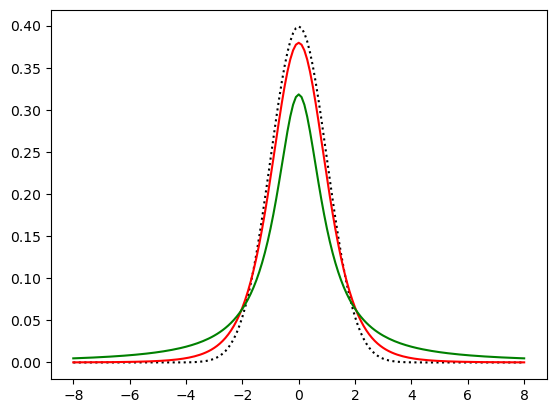

In [51]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴

plt.plot(x, stats.norm.pdf(x=x),
                          color = 'black', linestyle='dotted')              # 정규분포
plt.plot(x, stats.t.pdf(x=x,df=5),
                          color = 'red')              # t분포, 자유도 5
plt.plot(x, stats.t.pdf(x=x, df=1),
                          color = 'green')

#### 과제1_0412.
pdf, cdf, ppf를 활용하여 확률과 분위수를 구하는 사례를 작성하여 그 결과 값과 그래프(확률밀도함수, 누적분포함수)로 출력하세요.

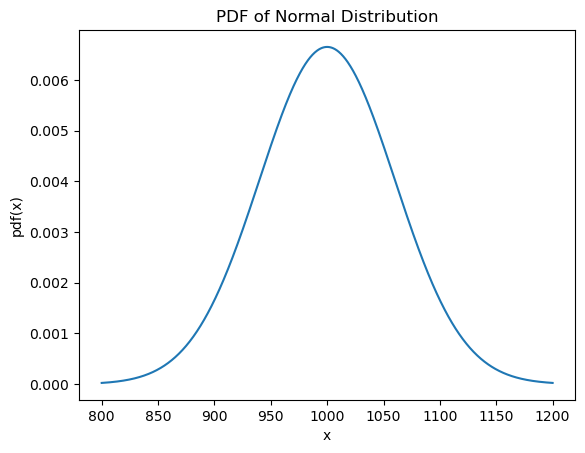

0.004698531256838376


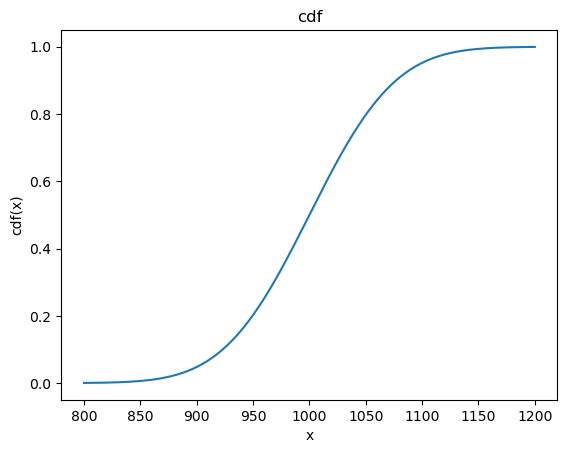

0.20232838096364308


9959.530614988234

In [52]:
# 어느 회사의 연봉이 평균 1000이고 표준편차가 60인 정규분포를 따른다. 그러면, 연봉이 950 이하일 확률


# x 값의 범위 지정
x = np.linspace(800, 1200, 1000)             
# x = np.linspace(800, 1200, 1000)800부터 1200까지의 범위를 1000개 범위로 하여 일반적인 값을 생성하여 x에 저장

# 주어진 정규분포에서 각 x 값에 대한 pdf 계산
pdf = norm.pdf(x, loc=1000, scale=60)

# pdf 그래프 그리기
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('PDF of Normal Distribution')
plt.show()
print(stats.norm.pdf(loc=1000, scale=60, x=950))           # 확률 계산

###############################

cdf = norm.cdf(x, loc=1000, scale=60)

# 그래프 그리기
plt.plot(x, cdf)
plt.xlabel('x')
plt.ylabel('cdf(x)')
plt.title('cdf')
plt.show()
print(stats.norm.cdf(loc=1000, scale=60, x=950))

################################
x = norm.ppf(0.25,loc=10000,scale=60)
x

#### 과제 2
t분포의 자유도를 5개로 조정하면서 그래프의 모습이 표준 정규 분포 대비 어떻게 변하는지 확인할 수 있는 그래프를 출력하세요.

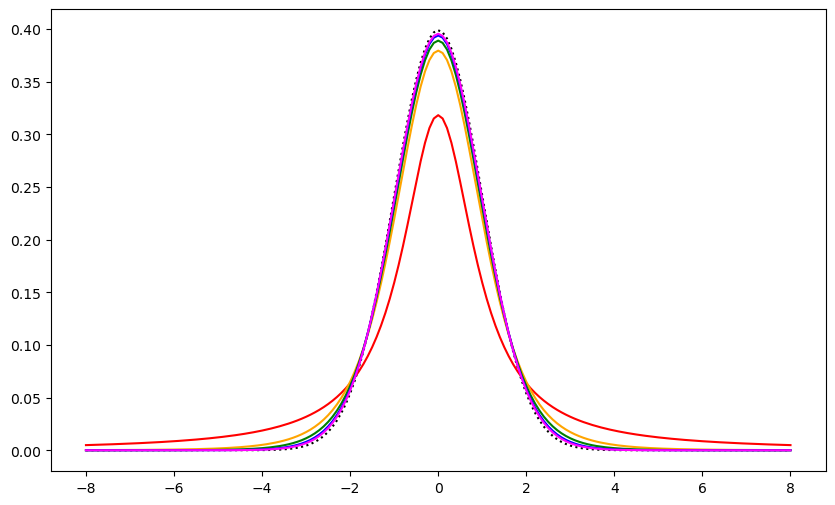

In [53]:
plt.figure(figsize=(10,6))

x=np.arange(-8, 8.1, 0.1)

plt.plot(x,stats.norm.pdf(x=x),color='black',linestyle='dotted')   # 표준정규분포

plt.plot(x,stats.t.pdf(x=x, df=1),color='red')
plt.plot(x,stats.t.pdf(x=x, df=5),color='orange')
plt.plot(x,stats.t.pdf(x=x, df=10),color='green')
plt.plot(x,stats.t.pdf(x=x, df=20),color='blue')
plt.plot(x,stats.t.pdf(x=x, df=30),color='magenta')

# t분포는 샘플이 30개 미만일 때는 자유도에 따라 서로 달라지는 궤적을 그림. 
# 자유도가 작아지면 편차가 그만큼 커진다. 자유도가 커지니까 정규분포에 가까워짐
# t분포를 사용한다는 것은 그만큼 불완전하다는 것

### 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법
    - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
    - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용
    - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
    - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
- 신뢰계수(신뢰수준)와 신뢰구간
    - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
    - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
    - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐
- 신뢰한계 : 신뢰구간의 하한값과 상한값
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차" --> 왜 표준오차로 나눌까? (모집단과 표본의 차이, 즉 표본의 불확실성 때문에)로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
    - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산.
    - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
    - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
    - 샘플사이즈가 커지면 자유도가 커지고 표준오차가 작아짐
    - 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐

예를 들어, 100명의 학생들의 키를 측정하여 표본평균을 계산하였습니다. 이 때, 표본의 크기는 100이며, 표본평균은 170cm입니다. 이러한 데이터를 바탕으로 모집단의 평균을 추정하고자 합니다. 이 때, 신뢰구간을 이용하여 추정값의 신뢰도를 평가할 수 있습니다.

먼저, 신뢰수준(confidence level)을 설정합니다. 신뢰수준은 추정값이 구간 내에 존재할 확률로, 일반적으로 95%나 99%로 설정됩니다. 이번 예시에서는 신뢰수준을 95%로 설정하겠습니다.

다음으로, 표본의 크기와 분산을 이용하여 표준오차(standard error)를 계산합니다. 표준오차는 표본평균과 모집단 평균의 차이를 추정하는 데 사용되는 지표입니다. 표준오차를 계산하기 위해서는 표본평균의 표준편차(standard deviation)와 표본의 크기가 필요합니다. 이번 예시에서는 표본의 표준편차가 5cm, 표본의 크기가 100명이므로, 표준오차는 다음과 같이 계산됩니다.

표준오차 = 5 / sqrt(100) = 0.5

마지막으로, 추정값과 신뢰수준, 표준오차를 이용하여 신뢰구간을 계산합니다. 이번 예시에서는 95%의 신뢰수준을 가지고 있으므로, 신뢰구간은 다음과 같이 계산됩니다.

신뢰구간 = 추정값 ± (신뢰계수 * 표준오차) = 170 ± (1.96 * 0.5) = (169.02, 170.98)

즉, 95%의 신뢰수준으로 모집단의 평균을 추정할 때, 표본평균은 약 169.02cm부터 170.98cm까지의 범위 내에 존재할 것으로 예상됩니다.

In [54]:
df = pd.read_csv('C:\hmkd1\m2_분석라이브러리\dataset/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [55]:
# 모평균의 점추정
fish = df.length
mu = np.mean(fish)
round(mu,2)

4.19

In [56]:
# 모분산의 점추정
sigma_2 = np.var(fish,ddof=1)
round(sigma_2,2)

0.68

In [57]:
# 표준오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

0.26

In [58]:
df = len(fish) - 1
df

9

In [59]:
# 신뢰구간 : 신뢰수준 95%
interval = stats.t.interval(alpha=0.95, df=df, loc=mu,scale=se)
interval

# 1-신뢰수준 = 유의수준

(3.597010056835825, 4.777068592173221)

In [60]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
se2 = sigma*10/np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df,loc=mu,scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [61]:
# Q. 샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2=(len(fish)*10)-1
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95,df=df2,loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [62]:
# 신뢰수준 95% vs 99%

stats.t.interval(alpha=0.99,df=df,loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

### 과제3_0412.
- 크기가 10인 표본 데이터를 생성하고 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [96]:
import numpy as np
from scipy.stats import norm
from scipy import stats

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.30 ~ 1.68


In [97]:
# 10배로 샘플 사이즈 확대
import numpy as np
from scipy.stats import norm

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)*10

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*10)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.44 ~ 1.54


### 과제4_0412.
어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다.<br> 
이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 위하여 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]<br>
표본의 크기를 무작위로 100배 확대

In [63]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))   # np.sqrt(x)의 x제곱근을 계산

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [64]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)*100

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*100)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

# 샘플 수가 늘면 신뢰구간이 줄어들음
# 신뢰구간은 95->99%로 늘리면 커짐

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 50.11 ~ 50.17


#### z분포와 t분포에서 신뢰구간 계산 방법의 차이

z분포와 t분포는 모집단의 평균을 추정하기 위해 사용되는 확률분포입니다. <br>
하지만, z분포는 모집단의 표준편차를 알고 있을 때, <br> t분포는 모집단의 표준편차를 알지 못할 때 사용됩니다. <br> 따라서, z분포는 큰 표본(일반적으로 30개 이상)에 대해서 사용되며, t분포는 작은 표본에 대해서 사용됩니다.

z분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (z분포의 임계값 * (표준편차/√n)), 표본평균 + (z분포의 임계값 * (표준편차/√n)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
z분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 알고 있을 때, 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준편차는 표본의 분산의 제곱근입니다.
n은 표본의 크기입니다.
반면, t분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (t분포의 임계값 * (표준오차)), 표본평균 + (t분포의 임계값 * (표준오차)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
t분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 모르고 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준오차는 표본의 표준편차를 이용해 계산됩니다.
즉, t분포에서는 모집단의 분산을 알지 못하기 때문에, 표본의 분산을 이용하여 표준편차를 구합니다.


신뢰구간을 구할 때, 정규분포와 t분포를 적용하는 방법은 다음과 같습니다.

- 모집단의 표준편차를 알고 있는 경우
만약 모집단의 표준편차를 알고 있다면, 표본의 크기가 작을 경우에는 t분포를 사용하지만, 표본의 크기가 충분히 크다면 정규분포를 사용하여 신뢰구간을 구할 수 있습니다. 이 때, 신뢰수준(confidence level)에 따라서 z값 또는 t값을 계산하여 신뢰구간을 구합니다.

- 모집단의 표준편차를 모르는 경우
만약 모집단의 표준편차를 모르는 경우, 표본의 크기가 작은 경우에는 t분포를 사용하여 신뢰구간을 구합니다. 이 때, 신뢰수준과 자유도(degree of freedom)에 따라서 t값을 계산하여 신뢰구간을 구합니다. 자유도는 표본의 크기에서 1을 뺀 값입니다.

예를 들어, 표본의 크기가 10인 경우, t분포를 사용하여 신뢰구간을 계산하고, 표본의 크기가 30 이상인 경우에는 정규분포를 사용하여 신뢰구간을 계산하는 것이 일반적입니다.

In [75]:
# 모집단의 표준편차를 알고 있는 경우
import numpy as np
from scipy.stats import norm, t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 모집단의 표준편차
pop_std = 0.5

# 신뢰수준
conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적확률분포)에 해당하는 z-score(표준편차 단위의 값)를 계산
z_val = norm.ppf((1 + conf_level) / 2)

# 신뢰구간 계산
conf_int = (mean - z_val * pop_std / np.sqrt(n), mean +z_val * pop_std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
신뢰구간: 49.83 ~ 50.45


In [76]:
from scipy.stats import norm

# 정규분포에서 95%의 구간을 구하기 위해 z-score를 계산합니다.
z = norm.ppf(0.975)

# z-score 출력
print(z)

1.959963984540054


In [77]:
# 모집단의 표준편차를 모르는 경우
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표본 표준편차
std = np.std(data, ddof=1)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# t값 계산
# t-분포에서 어떤 확률값(누적확률분포)에 해당하는 t-score(표준편차 단위의 값)를 계산
t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰구간 계산
conf_int = (mean - t_val * std / np.sqrt(n), mean +t_val * std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [78]:
from scipy.stats import t

# t-분포에서 95%의 구간을 구하기 위해 t-score를 계산합니다.
t_score = t.ppf(0.975, 9)  # 자유도 9를 포함해야 함

# t-score 출력
print(t_score)

2.2621571627409915
